# Universidade Federal do Rio de Janeiro

## Programa de Engenharia Metalúrgica e de Materiais
## Departamento de Engenharia Metalúrgica e de Materiais

### Prof. Leonardo Sales Araujo

In [1]:
#carrega as bibliotecas
import numpy as np
import matplotlib
import cv2
import pandas as pd
import skimage.morphology,skimage.measure,skimage.segmentation,skimage.color,skimage.util
import tkinter.filedialog
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.patches as mpatches

### Cria uma janela para abrir o arquivo e o salva como uma variável "imagem"

O OpenCV abre a imagem como arquivo de cores BGR, ao invés de RGB. Com isso, é necessário converter de BGR para RGB.

In [2]:
root = tkinter.Tk() #cria a janela no topo
root.withdraw() #esconde a janela

filename = tkinter.filedialog.askopenfilename()

print("'"+filename+"'")

#carrega a imagem
imagem2 = cv2.imread(filename)

#o python carrega a imagem em BGR e deve ser convertida para RGB
imagem = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

'C:/Users/wotde/Dropbox/Python/DIP/img/exemplo_segmentacao_5b.jpg'


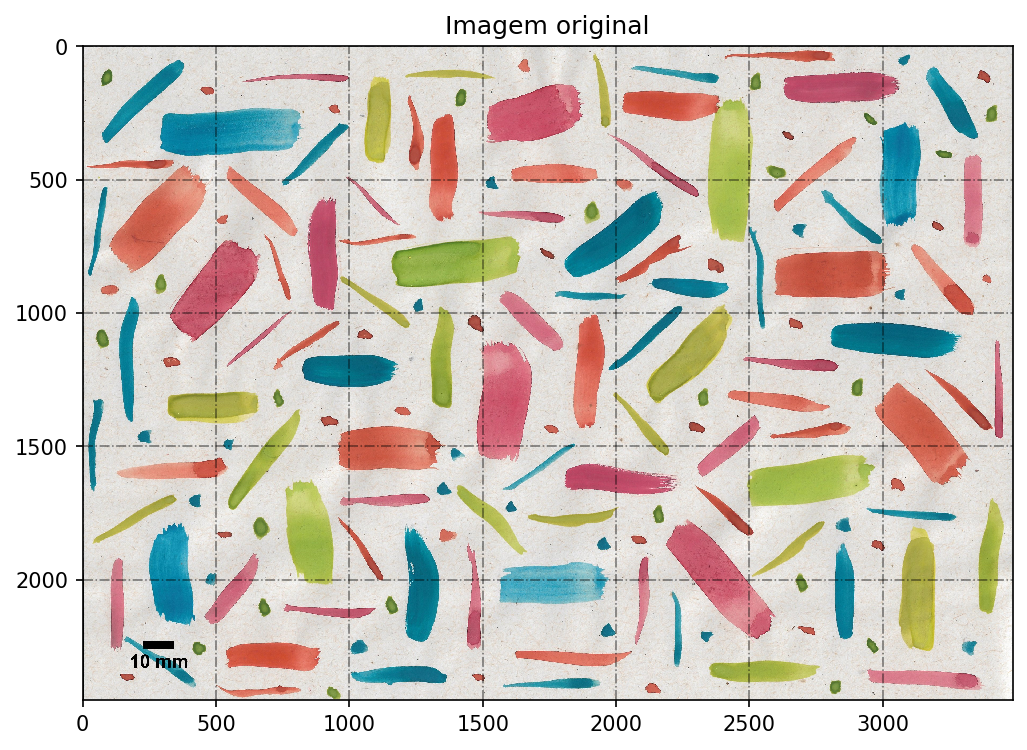

In [3]:
#para que a plotagem dafigura fique inline
%matplotlib inline

#mostra a figura
plt.figure(1, figsize=(8,12),dpi=150)
plt.subplot(111)
plt.title('Imagem original')
plt.imshow(imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
plt.show()

## Passo 1: estabelece a relação entre os pixels e a distância, por meio da barra de escala

In [4]:
# para permitir a janela iterativa
%matplotlib qt

#mostra a figura
plt.figure(2, figsize=(8,12),dpi=150)
plt.title('Imagem original')
plt.imshow(imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
plt.tight_layout()
plt.show()

#estabelece os pontos para o calculo da relação dos pixels com a distância
dim_b_escala = float(input("Dimensão na barra de escala: "))
unidade = input("Unidade da escala: ")

#faz o zoom na região da escala e abre em outra janela
#usa o ginput para denifir os pontos para o zoom
p1,p2 = plt.ginput(2,timeout=30, show_clicks=True)

# para permitir a janela iterativa
%matplotlib qt

plt.figure(2, figsize=(8,12),dpi=150)
plt.title('Clique para a relação px/dimensão')
plt.imshow(imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
plt.xlim([min(p1[0],p2[0]), max(p1[0],p2[0])])
plt.ylim([max(p1[1],p2[1]), min(p1[1],p2[1])])
plt.tight_layout()
plt.show()

#usa o ginput para denifir os pontos da barra de escala
esc1,esc2 = plt.ginput(2,timeout=30, show_clicks=True)

#estabelece a relação entre os pixels e a dimensão da escala
#considera que a relação entre pixels verticais e horizontais é 1
r_hor = np.absolute([esc2[0] - esc1[0]])
r_ver = np.absolute([esc2[1] - esc1[1]])

from scipy.spatial import distance
d_euc = distance.euclidean(esc1, esc2)
rel_px_deuc = d_euc/dim_b_escala
print("A relação baseada na distância euclideana é de",rel_px_deuc, "pixels/",unidade)


Dimensão na barra de escala: 10
Unidade da escala: mm
A relação baseada na distância euclideana é de 11.611586815251048 pixels/ mm


## Faz o corte da região de interesse para a análise

In [5]:
# para permitir a janela iterativa
%matplotlib qt

#mostra a imagem para corte
plt.figure(2, figsize=(8,12),dpi=150)
plt.title('Clique na imagem para o corte')
plt.imshow(imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
plt.tight_layout()
plt.show()

#faz o zoom na região da escala e abre em outra janela
#usa o ginput para denifir os pontos para o zoom
c1,c2 = plt.ginput(2,timeout=30, show_clicks=True)

dh = [int(c1[1]),int(c2[1])]
dv = [int(c1[0]),int(c2[0])]

print(dh,dv)

[5, 2430] [489, 3465]


In [6]:
# corta a imagem
corte_imagem = imagem[min(dh):max(dh), min(dv):max(dv)]

# mostra a figura
plt.figure(3, figsize=(8,12),dpi=150)
plt.title('Imagem cortada')
plt.imshow(corte_imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
#plt.xlim([c2[0], c1[0]])
#plt.ylim([c2[1], c1[1]])
plt.tight_layout()
plt.show()

## Estabelece vários elementos estruturantes de exemplo

In [7]:
#gerar diferente opções de elementos estruturantes para a imagem

el_estr1 = np.ones((3,3),np.uint8) #quadrado 3x3
el_estr2 = np.ones((7,7),np.uint8) #quadrado 7x7
el_estr3 = np.ones((5,1),np.uint8) #retangulo 5x1
el_estr4 = np.ones((1,5),np.uint8) #retangulo 1x5
el_estr5 = np.array([[0,1,0],[1,1,1],[0,1,0]]) #cruz
el_estr6 = skimage.morphology.diamond(5) #diamante
el_estr7 = skimage.morphology.disk(3) #disco
el_estr8 = skimage.morphology.disk(7) #disco
el_estr9 = skimage.morphology.star(10) #estrela

## Mostra os elementos estruturantes

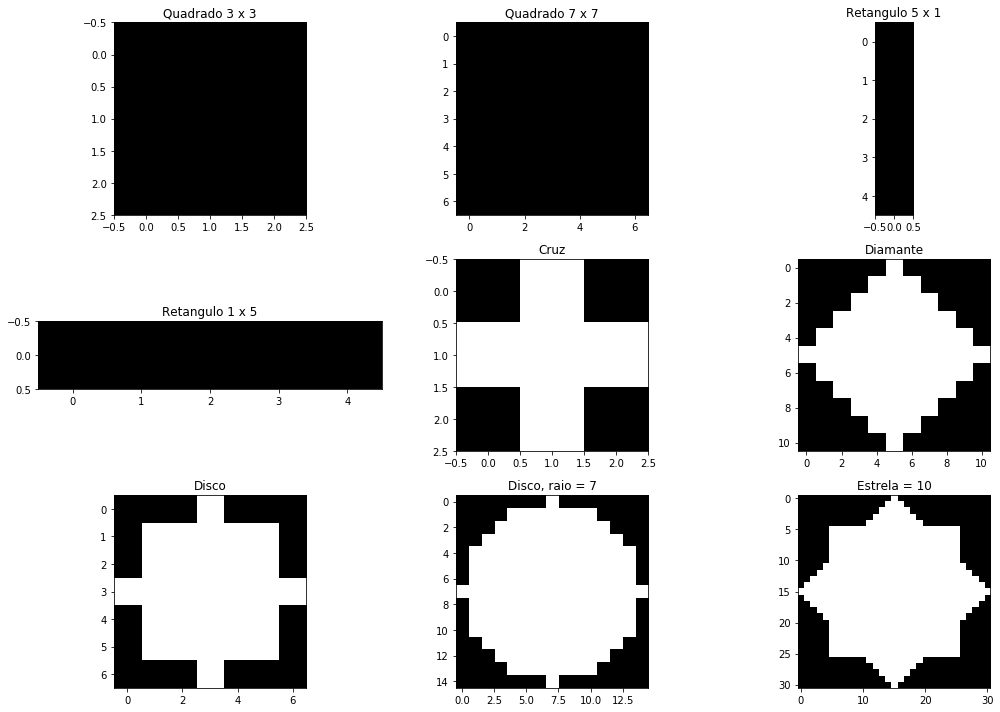

In [8]:
#para que a plotagem dafigura fique inline
%matplotlib inline

#cria figura para apresentar os elementos estruturantes
fig4, ax = plt.subplots(3,3, figsize=(15,10))

ax[0,0].imshow(el_estr1, cmap='gray');
ax[0,0].set_title('Quadrado 3 x 3')
ax[0,1].imshow(el_estr2, cmap='gray');
ax[0,1].set_title('Quadrado 7 x 7')
ax[0,2].imshow(el_estr3, cmap='gray');
ax[0,2].set_title('Retangulo 5 x 1')
ax[1,0].imshow(el_estr4, cmap='gray');
ax[1,0].set_title('Retangulo 1 x 5')
ax[1,1].imshow(el_estr5, cmap='gray');
ax[1,1].set_title('Cruz')
ax[1,2].imshow(el_estr6, cmap='gray');
ax[1,2].set_title('Diamante')
ax[2,0].imshow(el_estr7, cmap='gray');
ax[2,0].set_title('Disco')
ax[2,1].imshow(el_estr8, cmap='gray');
ax[2,1].set_title('Disco, raio = 3')
ax[2,1].imshow(el_estr8, cmap='gray');
ax[2,1].set_title('Disco, raio = 7')
ax[2,2].imshow(el_estr9, cmap='gray');
ax[2,2].set_title('Estrela = 10')
plt.tight_layout()
plt.show()

# Converte a imagem para outro espaço de cores

In [9]:
# separa os canais para analise da imagem RGB e da Imagem HSV
Im_R,Im_G,Im_B = cv2.split(corte_imagem)
Im_H,Im_S,Im_V = cv2.split(skimage.util.img_as_ubyte(skimage.color.rgb2hsv(corte_imagem)))

# para permitir a janela iterativa
%matplotlib qt

plt.figure(5, figsize=(8,12),dpi=150)
plt.title('Imagem cortada')
plt.imshow(corte_imagem)
plt.grid(color='k', linestyle='-.', linewidth=0.75, alpha=0.5)
plt.tight_layout()
plt.show()

#plota as imagens
#cria figura para apresentar os elementos estruturantes
fig6, ax = plt.subplots(2,3, figsize=(15,10),sharex=True, sharey=True)
ax[0,0].imshow(Im_R, cmap='gray');
ax[0,0].set_title('Canal R')
ax[0,1].imshow(Im_G, cmap='gray');
ax[0,1].set_title('Canal G')
ax[0,2].imshow(Im_B, cmap='gray');
ax[0,2].set_title('Canal B')
ax[1,0].imshow(Im_H, cmap='gray');
ax[1,0].set_title('Canal H')
ax[1,1].imshow(Im_S, cmap='gray');
ax[1,1].set_title('Canal S')
ax[1,2].imshow(Im_V, cmap='gray');
ax[1,2].set_title('Canal V')
plt.tight_layout()
plt.show()

In [10]:
#segmenta as cores no canal de Hue (H)
im_seg_verde = np.logical_and(Im_H > 38,Im_H < 65)
im_seg_azul = np.logical_and(Im_H > 130,Im_H < 143)
im_seg_salmao = np.logical_and(Im_H > 3 ,Im_H < 11)
im_seg_rosa = np.logical_and(Im_H > 241 ,Im_H < 255)

#segmenta o background
im_seg_back = Im_S <20

#apresenta as segmentações
#plota as imagens
#cria figura para apresentar os elementos estruturantes
fig7, ax = plt.subplots(2,3, figsize=(15,10),sharex=True, sharey=True)
ax[0,0].imshow(corte_imagem, cmap='gray');
ax[0,0].set_title('Imagem cortada')
ax[0,1].imshow(im_seg_verde, cmap='gray');
ax[0,1].set_title('Segmentação verde')
ax[0,2].imshow(im_seg_azul, cmap='gray');
ax[0,2].set_title('Segmentação azul')
ax[1,0].imshow(im_seg_salmao, cmap='gray');
ax[1,0].set_title('Segmentação salmão')
ax[1,1].imshow(im_seg_rosa, cmap='gray');
ax[1,1].set_title('Segmentação rosa')
ax[1,2].imshow(im_seg_back, cmap='gray');
ax[1,2].set_title('Segmentação do background')
plt.tight_layout()
plt.show()

In [12]:
#faz a aplicação de filtros de abertura e fechamento para eliminação de ruído

#região verde - usa dois metodos. opening e area opening
im_seg_verde_ed1 = skimage.morphology.binary_opening(im_seg_verde,el_estr8)
im_seg_verde_ed2 = skimage.morphology.area_opening(im_seg_verde,area_threshold=800)

#para que a plotagem dafigura fique inline
#%matplotlib inline
# para permitir a janela iterativa
%matplotlib qt

fig8, ax = plt.subplots(2,2, figsize=(15,10),sharex=True, sharey=True)
ax[0,0].imshow(corte_imagem, cmap='gray');
ax[0,0].set_title('Imagem Cortada')
ax[0,1].imshow(im_seg_verde, cmap='gray');
ax[0,1].set_title('Verde não corrigido')
ax[1,0].imshow(im_seg_verde_ed1, cmap='gray');
ax[1,0].set_title('Com binary_opening')
ax[1,1].imshow(im_seg_verde_ed2, cmap='gray');
ax[1,1].set_title('Com area_opening')
plt.tight_layout()
plt.show()


In [13]:
#tendo sido escolhido um método de limpeza do ruído, passa-se ao ajuste da imagem

#faz uma operação de fechamento naquela analisada
im_seg_verde_ed21 = skimage.morphology.area_closing(im_seg_verde_ed2,area_threshold=200)
im_seg_verde_ed22 = skimage.morphology.binary_closing(im_seg_verde_ed2,el_estr8)

#para que a plotagem dafigura fique inline
#%matplotlib inline

fig9, ax = plt.subplots(2,2, figsize=(15,10),sharex=True, sharey=True)
ax[0,0].imshow(corte_imagem, cmap='gray');
ax[0,0].set_title('Imagem Original')
ax[0,1].imshow(im_seg_verde_ed2, cmap='gray');
ax[0,1].set_title('Verde corrigido com area opening')
ax[1,0].imshow(im_seg_verde_ed21, cmap='gray');
ax[1,0].set_title('Com binary_closing')
ax[1,1].imshow(im_seg_verde_ed22, cmap='gray');
ax[1,1].set_title('Com area_closing')
plt.tight_layout()
plt.show()


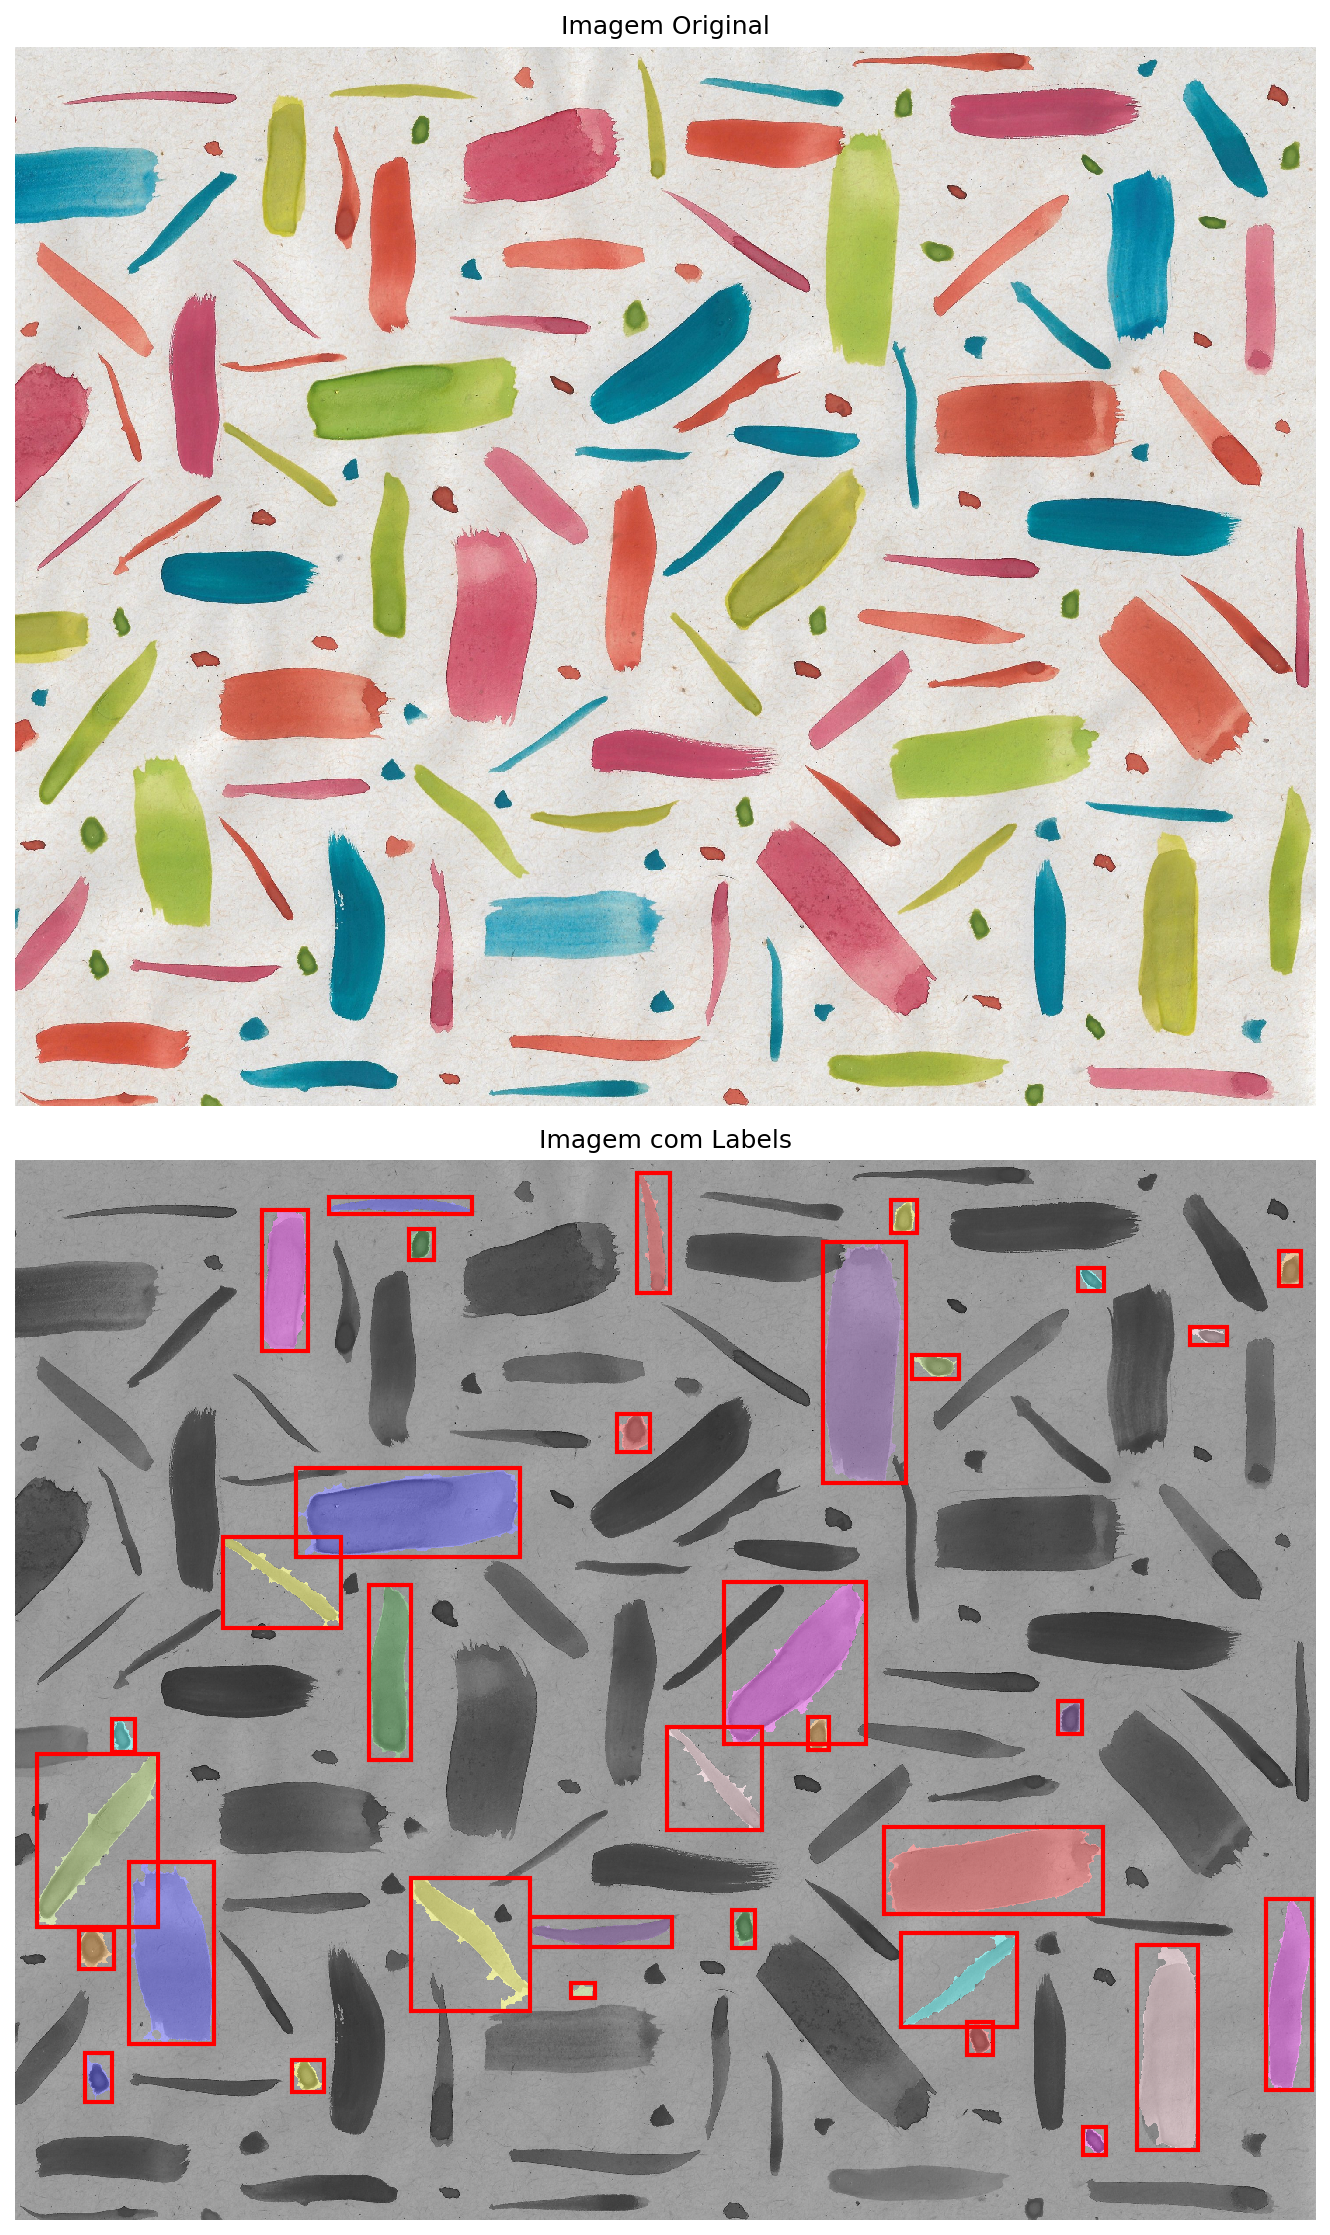

In [14]:
# remoção daquelas morfologias que estão tocando nas bordas e que não apresentarão seus valores verdadeiros
im_seg_verde_sb = skimage.segmentation.clear_border(im_seg_verde_ed22)
label_verde = skimage.measure.label(im_seg_verde_sb,connectivity=2)
label_verde_camada = skimage.color.label2rgb(label_verde, image=corte_imagem, bg_label=0)

#para que a plotagem dafigura fique inline
%matplotlib inline

fig10, ax = plt.subplots(2,1, figsize=(10, 15),dpi=150,sharex=True, sharey=True)
ax[0].imshow(corte_imagem, cmap='gray');
ax[0].set_title('Imagem Original')
ax[1].imshow(label_verde_camada)
ax[1].set_title('Imagem com Labels')
for region in skimage.measure.regionprops(label_verde):
    # take regions with large enough areas
    if region.area >= 1000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax[1].add_patch(rect)

ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

In [15]:
#regionprops para uma tabela compatível com pandas
dados_verde = skimage.measure.regionprops_table(label_verde,properties=['label', 'bbox', 'extent', 'area', 
                                                                        'eccentricity','euler_number',
                                                                        'orientation','perimeter', 'solidity'])
#dataframe para uso pelo pandas
df_verde = pd.DataFrame(dados_verde)  
df_verde.head(10)  

label  bbox-0  bbox-1  bbox-2  bbox-3    extent   area  eccentricity  \
0      1      29    1423     304    1499  0.385550   8058      0.990719   
1      2      84     718     123    1045  0.543323   6929      0.995549   
2      3      91    2003     166    2063  0.598222   2692      0.773427   
3      4     113     565     437     669  0.781873  26346      0.958825   
4      5     156     902     228     959  0.701998   2881      0.724914   
5      6     187    1848     737    2039  0.744474  78207      0.952610   
6      7     208    2892     287    2942  0.781013   3085      0.808410   
7      8     245    2433     299    2492  0.556497   1773      0.880565   
8      9     381    2689     422    2773  0.590592   2034      0.920847   
9     10     444    2051     499    2159  0.548990   3261      0.865460   

   euler_number  orientation    perimeter  solidity  
0             1     0.136370   702.198052  0.693818  
1             1     1.559512   754.925974  0.720945  
2             1    -0.319883   238.793939  0.860339  
3             1    -0.061911   837.026479  0.936081  
4             1    -0.294606   228.308658  0.907974  
5             1    -0.029550  1488.318939  0.909807  
6             1    -0.143432   237.373629  0.924206  
7             1     0.807189   191.137085  0.887387  
8             1     1.334372   229.279221  0.867747  
9             1     1.309393   282.285317  0.868905

In [16]:
#no regioprops do scikit, não há o item circularidade. Portanto, devo calculá-lo e inserir no dataframe obtido

#do dataframe do regionprops, coleta os valores de área e perímetro
area_verde_df = pd.DataFrame(df_verde.area)
perimetro_verde_df = pd.DataFrame(df_verde.perimeter)

circularidade_verde = np.divide(4*np.pi*area_verde_df,np.power(perimetro_verde_df,2))

#insere os valores de circularidade no dataframe
df_verde['circularity'] = circularidade_verde


In [17]:
df_verde.head(10)  

label  bbox-0  bbox-1  bbox-2  bbox-3    extent   area  eccentricity  \
0      1      29    1423     304    1499  0.385550   8058      0.990719   
1      2      84     718     123    1045  0.543323   6929      0.995549   
2      3      91    2003     166    2063  0.598222   2692      0.773427   
3      4     113     565     437     669  0.781873  26346      0.958825   
4      5     156     902     228     959  0.701998   2881      0.724914   
5      6     187    1848     737    2039  0.744474  78207      0.952610   
6      7     208    2892     287    2942  0.781013   3085      0.808410   
7      8     245    2433     299    2492  0.556497   1773      0.880565   
8      9     381    2689     422    2773  0.590592   2034      0.920847   
9     10     444    2051     499    2159  0.548990   3261      0.865460   

   euler_number  orientation    perimeter  solidity  circularity  
0             1     0.136370   702.198052  0.693818     0.205361  
1             1     1.559512   754.925974  0.720945     0.152782  
2             1    -0.319883   238.793939  0.860339     0.593251  
3             1    -0.061911   837.026479  0.936081     0.472548  
4             1    -0.294606   228.308658  0.907974     0.694558  
5             1    -0.029550  1488.318939  0.909807     0.443673  
6             1    -0.143432   237.373629  0.924206     0.688018  
7             1     0.807189   191.137085  0.887387     0.609858  
8             1     1.334372   229.279221  0.867747     0.486218  
9             1     1.309393   282.285317  0.868905     0.514262

<Figure size 2500x3000 with 0 Axes>

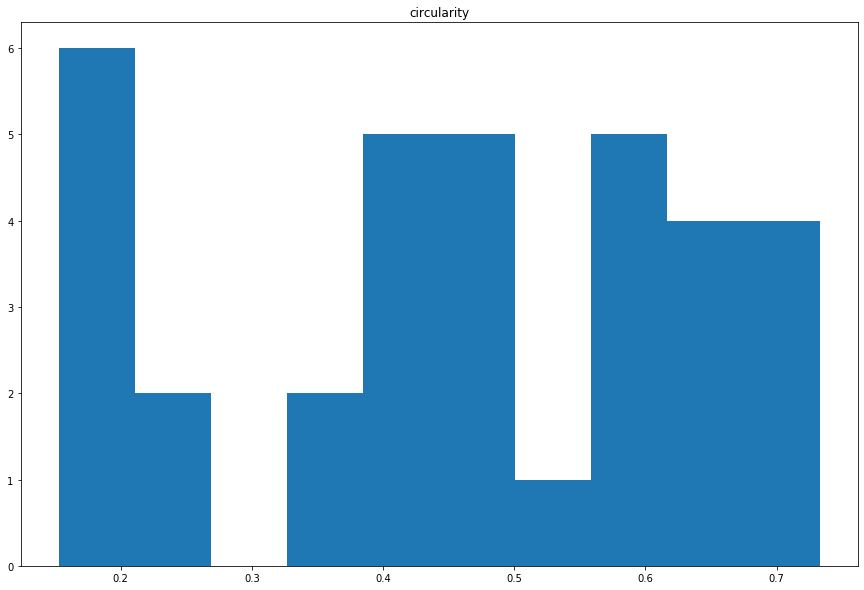

In [18]:
#para que a plotagem dafigura fique inline
%matplotlib inline

#faz um histograma com as distribuições de intensidade
plt.figure(9, figsize=(10,12),dpi=250)
hist = df_verde.hist(column='circularity',bins=10,grid=False,figsize=(15,10))
plt.show()